In [2]:
import dtoolcore
import dtoolcore.utils as utils
import time
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import re

In [3]:
rootdir = os.getcwd()

# pat = r'canal_\d+\.\d+_\d+'
pat = r'\d+\.\d+'
path = rootdir+"/dtool_db/"
#print(path)
def get_data_directories(root_dir):
    data_dirs = []
    for root, dirs, files in os.walk(root_dir):
        if root.endswith('/data'):
            data_dirs.append(root)
    return data_dirs

datadir_list = get_data_directories(path)


def plot_res(pt, file, title, yl='Massflowrate in kg/s', fkt=np.mean, legend=False):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    for i in datadir_list:
        if "_3" in i:
            match = re.search(pt, i)
            extracted = match.group()
            if cu ==0:
                mfl = np.loadtxt(i+file).reshape(1, -1)
                cu += 1
                ax.scatter(float(extracted), fkt(mfl[0,:]))
            else:
                mfl = np.append(mfl, np.loadtxt(i+file).reshape(1, -1), axis=0)
                cu+=1
                ax.scatter(float(extracted),fkt(mfl[cu-1,:]))
    if legend:
        ax.legend()
    ax.set_xlabel(r'radius in r/H', fontsize=14)
    ax.set_ylabel(yl, fontsize=14)

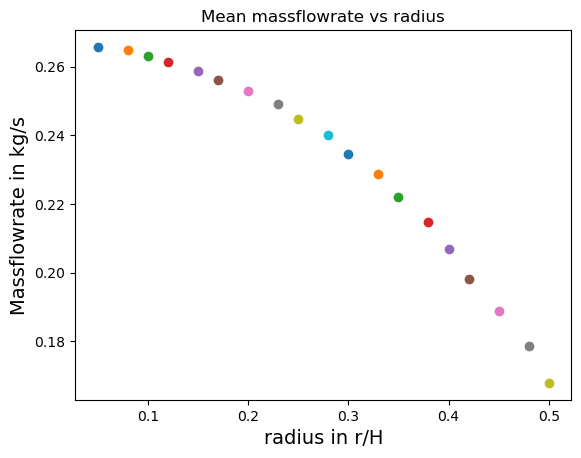

In [63]:
plot_res(pat, "/massflowrate.txt", "Mean massflowrate vs radius")

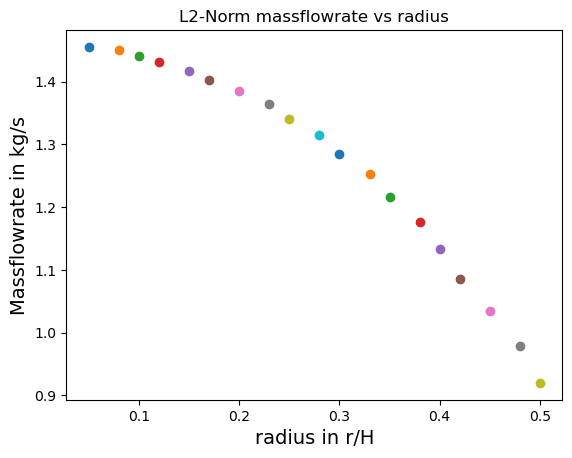

In [16]:
plot_res(pat, "/massflowrate.txt", "L2-Norm massflowrate vs radius", fkt=np.linalg.norm)


In [ ]:
def ret_mid_element(x):
    return x[int(x[0].size/2)]

#plot_res(pat, "/massflowrate.txt", "massflowrate at obstacle vs radius", fkt=ret_mid_element)

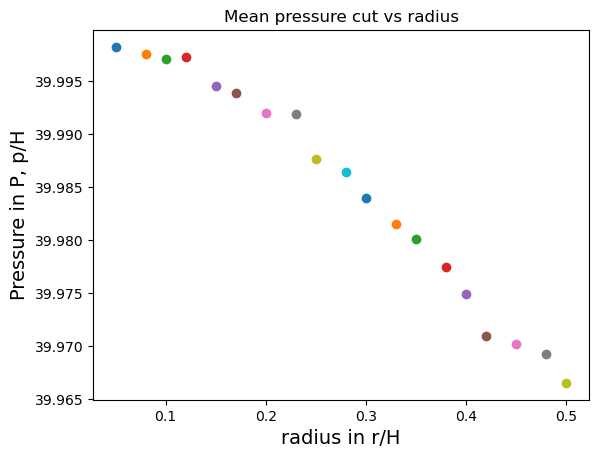

In [17]:
plot_res(pat, "/pressure_avg.txt", "Mean pressure cut vs radius", yl="Pressure in P, p/H")

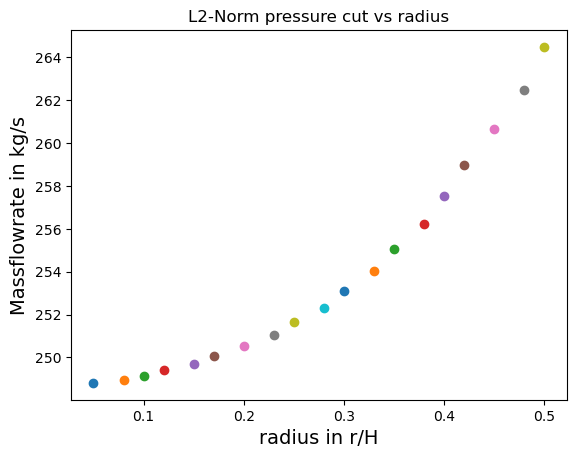

In [18]:
plot_res(pat, "/pressure_avg.txt", "L2-Norm pressure cut vs radius", fkt=np.linalg.norm)

/tmp/ipykernel_7153/283100055.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


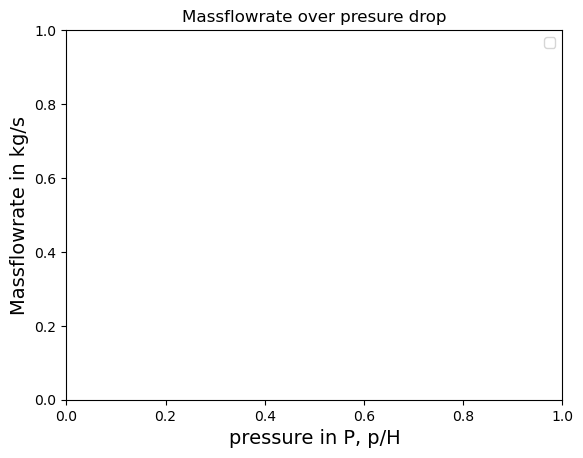

In [29]:
def plot_amp(pt, file, title, yl='Massflowrate in kg/s', legend=True):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    for i in datadir_list:
        if "3.txt" in i:
            match = re.search(pt, i)
            extracted = match.group()
            if cu ==0:
                mfl = np.loadtxt(i+file)
                pr_delta = np.linspace(80,0,mfl.size)
                pr = np.loadtxt(i+"/pressure_avg.txt")
                cu += 1
                ax.plot(pr, mfl, label=f'r= {extracted:s}')
            elif cu in s:
                mfl = np.loadtxt(i+file)
                pr_delta = np.linspace(80,0,mfl.size)
                pr = np.loadtxt(i+"/pressure_avg.txt")
                cu+=1
                ax.plot(pr, mfl, label=f'r= {extracted:s}')
            cu+=1
        if legend:
            ax.legend()
        ax.set_xlabel(r'pressure in P, p/H', fontsize=14)
        ax.set_ylabel(yl, fontsize=14)

plot_amp(pat,"/massflowrate.txt","Massflowrate over presure drop")

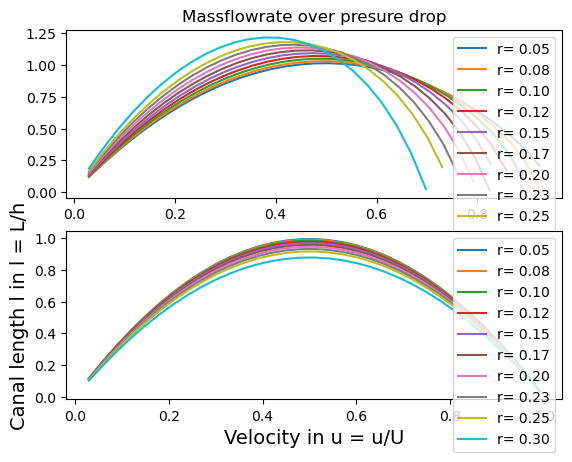

In [55]:
def plot_amp(pt, file, title, yl='Velocity', legend=True):
    fig, ax = plt.subplots(2)
    ax[0].set_title(title)
    cu = 0
    for i in datadir_list:
        match = re.search(pt, i)
        extracted = match.group()
        if cu ==0:
            u = np.loadtxt(i+file)
            pr = np.loadtxt(i+"/y_at_.5.txt")
            u2 = np.loadtxt(i+"/x_at_1.txt")
            pr2 = np.loadtxt(i+"/y_at_1.txt")
            cu += 1
            ax[0].plot(u,pr, label=f'r= {extracted:s}')
            ax[1].plot(u2,pr2, label=f'r= {extracted:s}')
        elif cu in s:
            u = np.loadtxt(i+file)
            pr = np.loadtxt(i+"/y_at_.5.txt")
            u2 = np.loadtxt(i+"/x_at_1.txt")
            pr2 = np.loadtxt(i+"/y_at_1.txt")
            cu+=1
            ax[0].plot(u,pr, label=f'r= {extracted:s}')
            ax[1].plot(u2,pr2, label=f'r= {extracted:s}')
        cu+=1
    if legend:
        ax[0].legend()
        ax[1].legend()
    ax[1].set_xlabel(r'Velocity in u = u/U', fontsize=14)
    ax[1].set_ylabel(r'Canal length l in l = L/h', fontsize=14)

plot_amp(pat,"/x_at_.5.txt","Massflowrate over presure drop")

FileNotFoundError: /home/ilia/Documents/GIT/bsc-ilia-fedotov/conda/dtool_db/parametric_canal_0.30_250/data/massflowrate.txt not found.

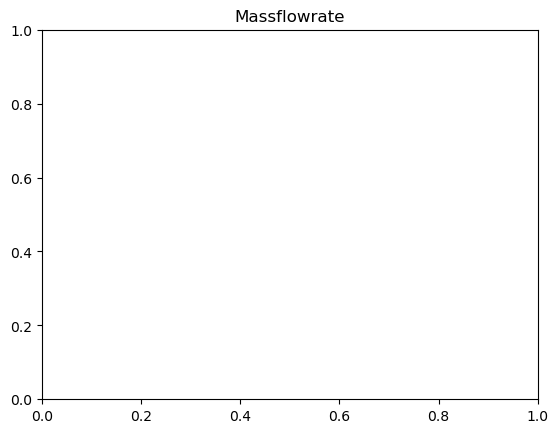

In [4]:
pat = r'\d+\.\d+'
pat2 = r'(?<=_)\d+(?=/)'

def plot_mfl(pt, pt2, file, title, yl='Velocity', legend=True):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    radii = np.round(np.linspace(0.05,0.5,19),2)
    radii[5] = 0.17
    radii[11] = 0.33
    radii[17] = 0.47
    press = np.array([20,40,60,100,120,140])
    arr = np.empty((19, 6))
    for i in datadir_list:
        match = re.search(pt, i)
        match2 = re.search(pt2, i)
        extracted = match.group()
        extracted2 = match2.group()
        #print(extracted)
        #print(extracted2)
        if cu ==0 and extracted2!="3" and extracted2!="80":
            u = np.loadtxt(i+file)
            cu += 1
            arr[np.where(radii==float(extracted))[0], np.where(press==int(extracted2))[0]] = np.max(u)
            """ax.scatter(float(extracted), int(extracted2), c=np.max(u), cmap='viridis', s=10)"""
            #ax.plot(u,pr, label=f'r= {extracted:s}')
        elif extracted2!="3" and extracted2!="80":
            u = np.loadtxt(i+file)
            cu+=1
            arr[np.where(radii==float(extracted))[0], np.where(press==int(extracted2))[0]] = np.max(u)
            #ax[0].plot(u,pr, label=f'r= {extracted:s}')
            #ax.scatter(float(extracted), int(extracted2), c=np.max(u), cmap='viridis', s=10)
        #cu+=1
    neg = ax.imshow(arr)
    ax.set_xticks(np.arange(len(press)))
    ax.set_yticks(np.arange(len(radii)))
    ax.set_xticklabels(press)
    ax.set_yticklabels(radii)
    fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7)
    #if legend:
    #    ax.legend()
    #ax.set_xlabel(r'obstacle r', fontsize=14)
    #ax.set_ylabel(r'delta P', fontsize=14)

plot_mfl(pat, pat2, "/massflowrate.txt", "Massflowrate", yl='P delta', legend=True)



In [27]:
pat = r'\d+\.\d+'
pat2 = r'\d+$'

i = "abcs_1.12_123"
match = re.search(pat, i)
match2 = re.search(pat2, i)
extracted = match.group()
extracted2 = match2.group()
print(extracted)
print(extracted2)

1.12
123


In [41]:
t = np.linspace(0.05,0.5,19)
print(t[np.where(radii==0.425)[0]])

[]


In [50]:
radii = np.round(np.linspace(0.05,0.5,19),2)
print(radii)
print(t[17])

[0.05 0.08 0.1  0.12 0.15 0.18 0.2  0.23 0.25 0.28 0.3  0.32 0.35 0.38
 0.4  0.42 0.45 0.48 0.5 ]
0.47500000000000003


In [15]:
path = rootdir+"/dtool_db/parametric_canal_0.80_2310/data/"
print(path)

/home/ilia/Documents/GIT/bsc-ilia-fedotov/conda/dtool_db/parametric_canal_0.80_2310/data/


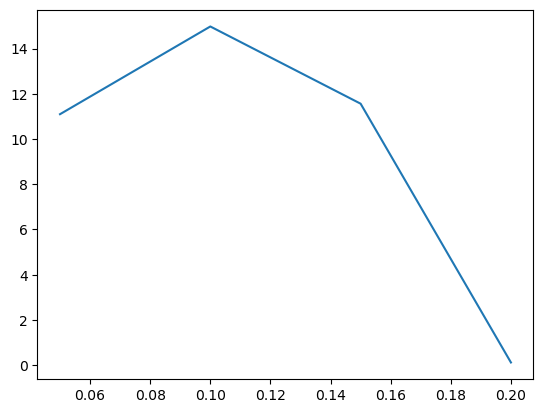

In [21]:
x = np.loadtxt(path+"x_at_.5_0.32/x_at_.5.txt")
y = np.loadtxt(path+"y_at_.5_0.32/y_at_.5.txt")
sort = np.argsort(x)
plt.plot(x[sort],y[sort])

In [16]:
np.linspace(0.001, .75, 75)
#np.linspace(2,230, 115)

array([0.001     , 0.01112162, 0.02124324, 0.03136486, 0.04148649,
       0.05160811, 0.06172973, 0.07185135, 0.08197297, 0.09209459,
       0.10221622, 0.11233784, 0.12245946, 0.13258108, 0.1427027 ,
       0.15282432, 0.16294595, 0.17306757, 0.18318919, 0.19331081,
       0.20343243, 0.21355405, 0.22367568, 0.2337973 , 0.24391892,
       0.25404054, 0.26416216, 0.27428378, 0.28440541, 0.29452703,
       0.30464865, 0.31477027, 0.32489189, 0.33501351, 0.34513514,
       0.35525676, 0.36537838, 0.3755    , 0.38562162, 0.39574324,
       0.40586486, 0.41598649, 0.42610811, 0.43622973, 0.44635135,
       0.45647297, 0.46659459, 0.47671622, 0.48683784, 0.49695946,
       0.50708108, 0.5172027 , 0.52732432, 0.53744595, 0.54756757,
       0.55768919, 0.56781081, 0.57793243, 0.58805405, 0.59817568,
       0.6082973 , 0.61841892, 0.62854054, 0.63866216, 0.64878378,
       0.65890541, 0.66902703, 0.67914865, 0.68927027, 0.69939189,
       0.70951351, 0.71963514, 0.72975676, 0.73987838, 0.75   